### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [8]:
data = pd.read_csv('data/coupons.csv')

In [10]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [12]:
#Finding the msising values using panda isna() and then Print the data.
missing_values = data.isna()

#Finding the count of missing values using panda and Print the data.
missing_count = data.isna().sum()
print(missing_count)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [14]:
#Based on result printed in the above section about the missing the values we find that for some specific columns the count of misisng values are in very proportion and it will not impact on predicting the result on removing those Data.
#It is also observed that the 'car' column does not have any significant value that would influence the predcictive results. 
# As a process of Data cleaning processes we need to also find the duplicate data. Then drop duplicate data, Also check the correct data types.
# Based on all above observation we need to drop duplicate data, drop 'car' column and also delete rows of missing values as the portion of misisng rows is 5% of the total data.

#using panda duplicate to find the duplicate data in the dataframe.
duplicates = data.duplicated()

#Using drop_duplicate function delete duplicate records and only keep the last value.
data.drop_duplicates(keep='last')

#drop car column as it does not have an impact.
data.drop('car',axis=1, inplace=True)

#Review the missing count of data after dopping 'car' column.
missing_count = data.isna().sum()

#Drop data refering to subset of columns and deleting only the rows that has empty data.
data.dropna(subset=['Bar','CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], inplace=True)

#Review the data and count of record after deleting all missing or problematic data.
missing_count = data.isna().sum()

#Review the datatype of the final dataframe to make sure the query ahead is meaningful.
print(data.dtypes)




destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


4. What proportion of the total observations chose to accept the coupon?



In [16]:
#find the count of data after the data cleanup.
row_count_after_cleanup = len(data)
print(row_count_after_cleanup)


#find total rows where coupon accepted column 'Y' is 1 and describe the result
total_row_with_accpeted_coupons = data.query('Y == 1')
print(total_row_with_accpeted_coupons.describe())

#To calculate the proportion of total observatins chose to accept the coupon, we will use value_counts  counts the occurrences of each unique value in "Y" coulmn
# Then we use normalize=True, This argument converts the counts into proportions by dividing each count by the total number of observations
# Then we extracts the proportion specifically for the 1 value.
proportion = data['Y'].value_counts(normalize=True)[1]
print(proportion)



12079
       temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  6877.000000   6877.000000            6877.0        6877.000000   
mean     64.277301      0.387814               1.0           0.525956   
std      18.979407      0.487287               0.0           0.499362   
min      30.000000      0.000000               1.0           0.000000   
25%      55.000000      0.000000               1.0           0.000000   
50%      80.000000      0.000000               1.0           1.000000   
75%      80.000000      1.000000               1.0           1.000000   
max      80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp       Y  
count        6877.000000     6877.000000    6877.000000  6877.0  
mean            0.091028        0.220300       0.779700     1.0  
std             0.287670        0.414479       0.414479     0.0  
min             0.000000        0.000000       0.000000     1.0  
25%   

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

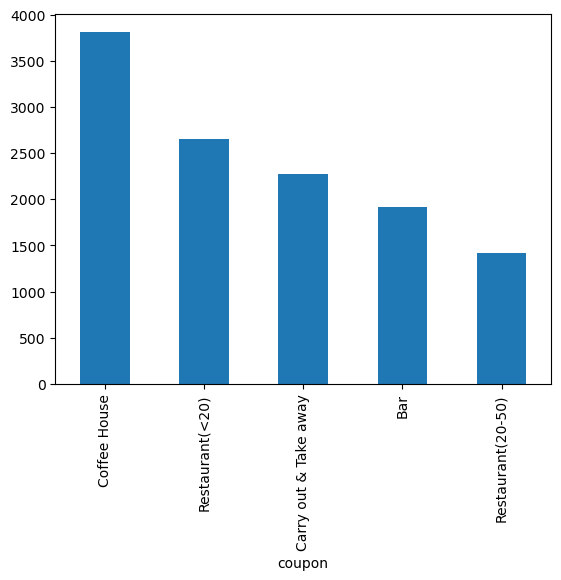

In [18]:
#This plot is used to visualize the bar coupon. 
data['coupon'].value_counts().plot(kind='bar')


6. Use a histogram to visualize the temperature column.

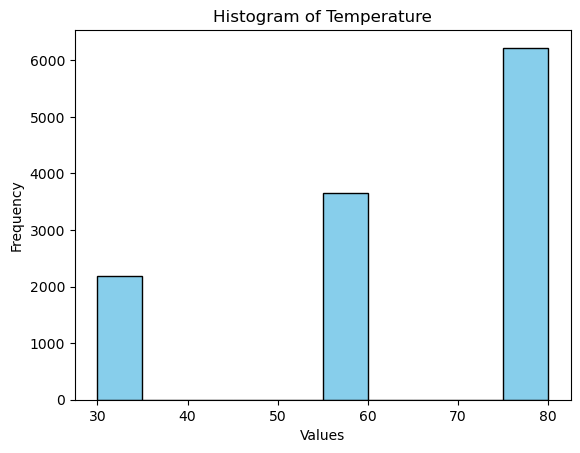

In [20]:
#Used matplotlib library to highlight historgram visualization for temperatre column in the data frame used for coupon. Use xlable and ylabel for defining the x and y axis and also used title to have meaningful title to the graph. 
#Set the x and y labels
plt.xlabel('Values')
plt.ylabel('Frequency')
# Set the title
plt.title("Histogram of Temperature")
# Key parameters for the hist() method:
#column: Specify the column(s) to plot.
#bins: Set the number of bins in the histogram.
#edgecolor='black': This argument sets the color of the edges of the bars to black. You can use any valid color name or hex code.
plt.hist(data['temperature'], bins=10, color='skyblue', edgecolor='black')

plt.show()

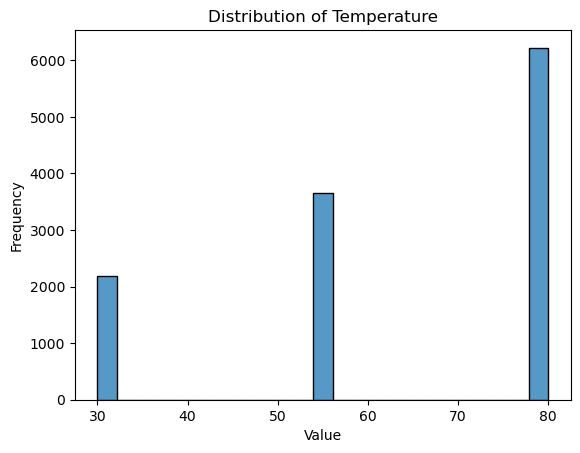

In [22]:
#Used seaborn library to highlight historgram visualization for temperatre column in the data frame used for coupon. 
#Create the histogram
ax = sns.histplot(data=data, x="temperature")
# Set the title
ax.set_title("Distribution of Temperature")
# Set the x and y labels
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

# Show the plot
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [24]:
#create a dataframe for a bar coupons and get the count of dataframe.
bar_coupons_df = data.loc[(data['coupon'] == 'Bar')]
count_total_bar_coupon = len(bar_coupons_df)

2. What proportion of bar coupons were accepted?


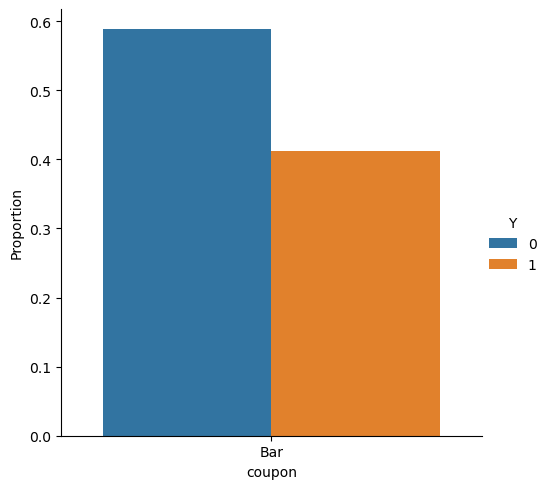

In [26]:
#Using panda query to find the bar coupons accepted.
bar_coupons_df_accepted = bar_coupons_df.query('Y == 1')
count_bar_coupons_df_accepted = len(bar_coupons_df_accepted)

#Using panda query to find the bar coupons rejected.
bar_coupons_df_rejected = bar_coupons_df.query('Y == 0')
count_bar_coupons_df_rejected = len(bar_coupons_df_rejected)

#calculating the proportions of bar coupons that were acepted and rejected. Using the dataframe based on bar coupon and looking at the condition on 'Y' with value 0 and 1 to define accepted and rejected status. 
accepted_proportion = bar_coupons_df['Y'].value_counts(normalize=True)[1] 
rejected_proportion = bar_coupons_df['Y'].value_counts(normalize=True)[0] 

# Calculate proportions
# value_counts(normalize=True): This calculates the proportion of each value within each category.
# reset_index(): This resets the index to create a tidy dataframe suitable for plotting.
# catplot(kind="bar"): This creates a bar plot to represent the proportions.
# hue: This parameter allows you to further split the bars based on another variable, such as the Y column in this case.
bar_coupon_proportion_df = bar_coupons_df.groupby('coupon')['Y'].value_counts(normalize=True).reset_index(name='Proportion')

# Using Seaborn to plot Categorical estimation plot to represent propoartion of bar coupon. 
sns.catplot(x='coupon', y='Proportion', hue='Y', kind='bar', data=bar_coupon_proportion_df)
                   

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


33.50757971772086
7.684265551489807
  Bar Visited Condition  Bar Accpeted Total Count  Acceptance Rate
0      3 or fewer times                       788        33.507580
1     more than 3 times                       788         7.684266


<Axes: xlabel='Bar Visited Condition', ylabel='Acceptance Rate'>

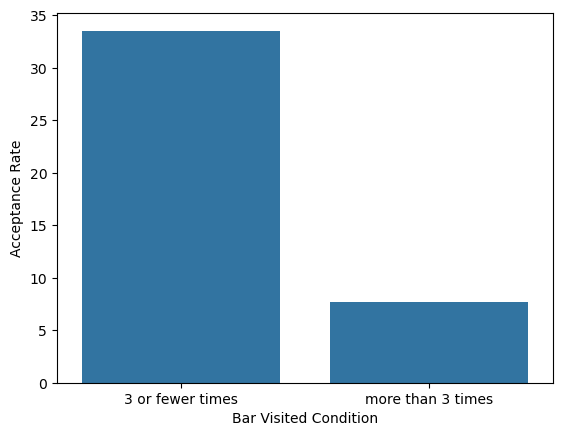

In [32]:
#Filtered the bar coupon data who went to bar 3 or fewer time and accepted the coupon
bar_3_or_less_accepted_result = bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(['never','less1','1~3'])) & (bar_coupons_df['Y'] == 1)]
count_bar_3_or_less_accepted_result = len(bar_3_or_less_accepted_result)

#calculate the acceptance rate of drivers who went to a bar 3 or fewer time over total bar coupon.
accepted_rate_for_3_or_less_bar_coupon = (count_bar_3_or_less_accepted_result / count_total_bar_coupon) * 100
print(accepted_rate_for_3_or_less_bar_coupon)

#Filtered the bar coupon drivers who went to a bar more than 3 times over total bar coupon accepted.
bar_more_than_3_result = bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(['4~8','gt8'])) & (bar_coupons_df['Y'] == 1)]
count_bar_more_than_3_result = len(bar_more_than_3_result)

#calculate the acceptance rate of drivers who went to a bar more than 3 times over total bar coupon.
accepted_rate_for_more_than_3_bar_coupon = (count_bar_more_than_3_result / count_total_bar_coupon) * 100
print(accepted_rate_for_more_than_3_bar_coupon)

#Dataset to represent the bar acceptance rate for different visited conditions.
accepted_rate_on_bar_coupons_data = { 'Bar Visited Condition': ['3 or fewer times', 'more than 3 times']}
accepted_rate_on_bar_coupons_data['Bar Accpeted Total Count'] = [count_bar_coupons_df_accepted, count_bar_coupons_df_accepted]
accepted_rate_on_bar_coupons_data['Acceptance Rate'] = [accepted_rate_for_3_or_less_bar_coupon, accepted_rate_for_more_than_3_bar_coupon]

#Create the data frame
accepted_rate_on_bar_coupons_df = pd.DataFrame(accepted_rate_on_bar_coupons_data)
print(accepted_rate_on_bar_coupons_df)

#SeaBorn graph to highlight the acceptance rate for condition. This is noticed that driver who visited bar more than 3 times has more acceptance rate for the bar coupon.
sns.barplot(data=accepted_rate_on_bar_coupons_df, x='Bar Visited Condition', y='Acceptance Rate')


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0.5, 1.0, 'Comparison In Acceptance Rate on Bar Coupon for different visited conditions')

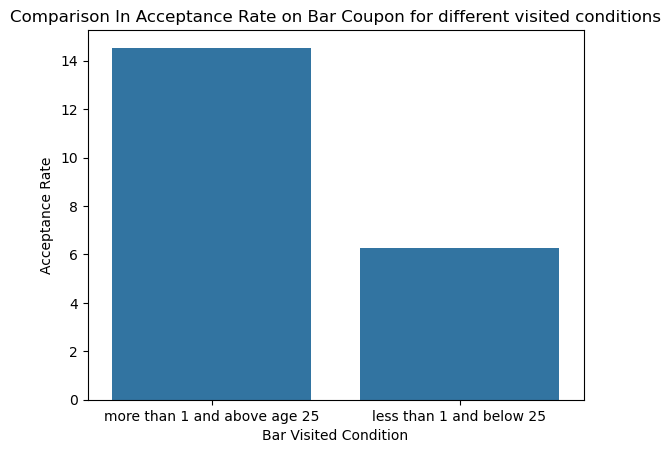

In [36]:
#Filtered the data on dataframe with Bar coupon when driver visited more than once a month and age is greater than 25.
bar_coupons_more_than_1_over_age_25 = bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(['1~3','4~8','gt8'])) & (bar_coupons_df['age'].isin(['26','31','36','41','46','50plus']))]

#Accepted bar coupon when driver visited more than once a month and age is greater than 25.
accepted_bar_coupons_more_than_1_over_age_25 = bar_coupons_more_than_1_over_age_25.query('Y == 1')
count_accepted_bar_coupons_more_than_1_over_age_25 = len(accepted_bar_coupons_more_than_1_over_age_25)

#Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 on total bar coupon.
acceptance_rate_bar_coupons_more_than_1_over_age_25 = (count_accepted_bar_coupons_more_than_1_over_age_25/count_total_bar_coupon) * 100

#Filtered the data on dataframe with Bar coupon when driver visited less than once a month and age is less than 25.
bar_coupons_for_all_others = bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(['never','less1'])) & (bar_coupons_df['age'].isin(['21','below21']))]

#Filtered the data on dataframe with Bar coupon when driver visited less than once a month and age is less than 25.
accepted_bar_coupons_for_all_others = bar_coupons_for_all_others.query('Y == 1')
count_accepted_bar_coupons_bar_coupons_for_all_others = len(accepted_bar_coupons_for_all_others)

#Acceptance rate for drivers who go to a bar less than once a month and age is less than 25 on total bar coupon.
acceptance_rate_bar_coupons_for_all_others = (count_accepted_bar_coupons_bar_coupons_for_all_others/count_total_bar_coupon) * 100

#Prepare the driver data with bar coupon to compare the acceptance rate of driver who visited more than once a month and age is greater than 25 to the others. 
accepted_rate_on_driver_with_bar_coupons_data = { 'Bar Visited Condition': ['more than 1 and above age 25', 'less than 1 and below 25']}
accepted_rate_on_driver_with_bar_coupons_data['Bar Accpeted Total Count'] = [count_bar_coupons_df_accepted, count_bar_coupons_df_accepted]
accepted_rate_on_driver_with_bar_coupons_data['Acceptance Rate'] = [acceptance_rate_bar_coupons_more_than_1_over_age_25, acceptance_rate_bar_coupons_for_all_others]

accepted_rate_on_driver_with_bar_coupons_df = pd.DataFrame(accepted_rate_on_driver_with_bar_coupons_data)

#yes there is a difference observed between the accpetance rates. The acceptance rate for Bar coupon drivers who visited bar more than 1 and above age 25 is higher than drivers who visted once less than once and below age 25.
sns.barplot(data=accepted_rate_on_driver_with_bar_coupons_df, x='Bar Visited Condition', y='Acceptance Rate')

# Set the title
plt.title("Comparison In Acceptance Rate on Bar Coupon for different visited conditions")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


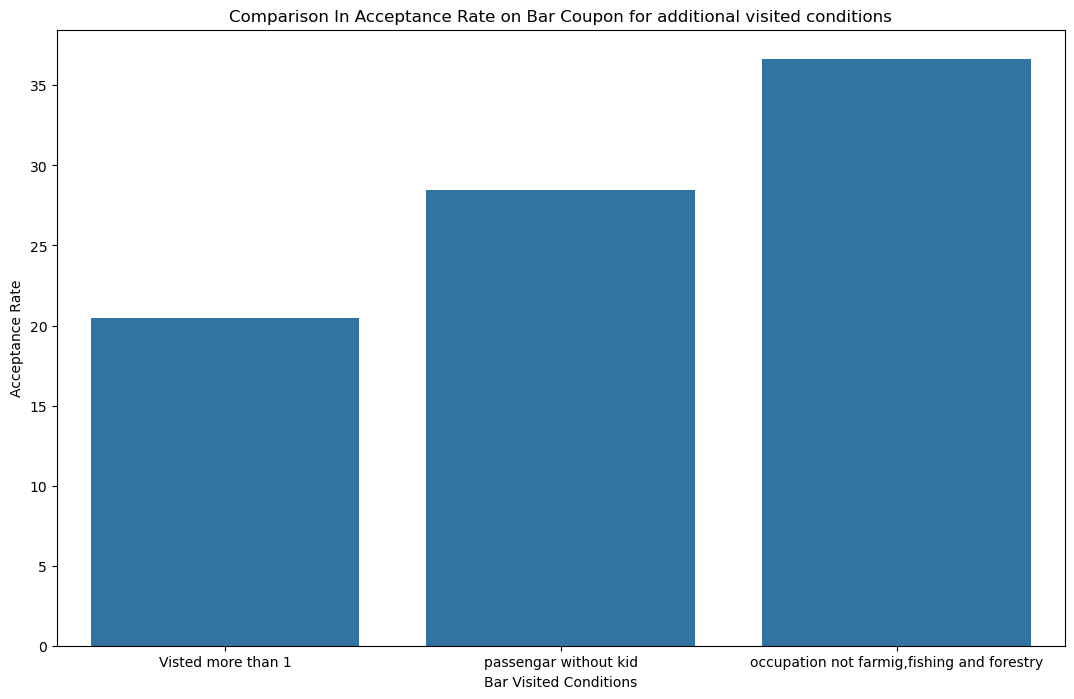

In [61]:
#Filtered the data on dataframe with Bar coupon when driver visited more than once a month.
accepted_bar_coupons_more_than_1 = bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(['1~3','4~8','gt8'])) & (bar_coupons_df['Y'] == 1)]
count_accepted_bar_coupons_more_than_1 = len(accepted_bar_coupons_more_than_1)

#Calculated accepted rate for bar coupon with more than one visit on total bar coupon.
acceptance_rate_bar_coupons_more_than_1 = (count_accepted_bar_coupons_more_than_1/count_total_bar_coupon) * 100

#Filtered the data on dataframe with Bar coupon when driver had a passenger that were not a kid.
accepted_bar_coupons_with_no_children = bar_coupons_df.loc[(bar_coupons_df['has_children'] == 0) & (bar_coupons_df['Y'] == 1)]
count_accepted_bar_coupons_with_no_children = len(accepted_bar_coupons_with_no_children)

#Calculated accepted rate for Bar coupon when driver had a passenger that were not a kid on total bar coupon
acceptance_rate_bar_coupons_with_no_children = (count_accepted_bar_coupons_with_no_children/count_total_bar_coupon) * 100

#Filtered the data dataframe with Bar coupon when driver had occupations other than farming, fishing and forestry. The reason Comparing the occupation to unemployed because in the data there is no occupation like farming, forestry and fishing. 
accepted_bar_coupons_with_occupation = bar_coupons_df.loc[(bar_coupons_df['occupation'] != 'Unemployed') & (bar_coupons_df['Y'] == 1)]
count_accepted_bar_coupons_with_occupation = len(accepted_bar_coupons_with_occupation)

#Calculated accepted rate for Bar coupon when driver had occupations other than farming, fishing and forestry on total bar coupon 
acceptance_rate_count_accepted_bar_coupons_with_occupation = (count_accepted_bar_coupons_with_occupation/count_total_bar_coupon) * 100

#Dataset is created to represent the comparison between different accepted rates calculated for different conditions.
accepted_rate_on_bar_coupons_data_additional_condition = { 'Bar Visited Conditions': ['Visted more than 1', 'passengar without kid', 'occupation not farmig,fishing and forestry']}
accepted_rate_on_bar_coupons_data_additional_condition['Bar Accpeted Total Count'] = [count_bar_coupons_df_accepted, count_bar_coupons_df_accepted, count_bar_coupons_df_accepted]
accepted_rate_on_bar_coupons_data_additional_condition['Acceptance Rate'] = [acceptance_rate_bar_coupons_more_than_1, acceptance_rate_bar_coupons_with_no_children, acceptance_rate_count_accepted_bar_coupons_with_occupation]

#Dataframe is generated using the dataset prepared for different conditions.
accepted_rate_on_bar_coupons_additional_condition_df = pd.DataFrame(accepted_rate_on_bar_coupons_data_additional_condition)

#Used Seaborn to plot the comparison between acceptance rate for bar coupon for driver who can accept the coupon for driver who visited more than 1 once, had passenger without kid and had occupation other than farming, fishing and forestry.
# Create the figure and axes
fig, ax = plt.subplots(figsize=(13, 8))

# Create the barplot to display the accpetance on different condition
sns.barplot(data=accepted_rate_on_bar_coupons_additional_condition_df, x='Bar Visited Conditions', y='Acceptance Rate', ax=ax )

# Set the title
plt.title("Comparison In Acceptance Rate on Bar Coupon for additional visited conditions")

# Show the plot
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



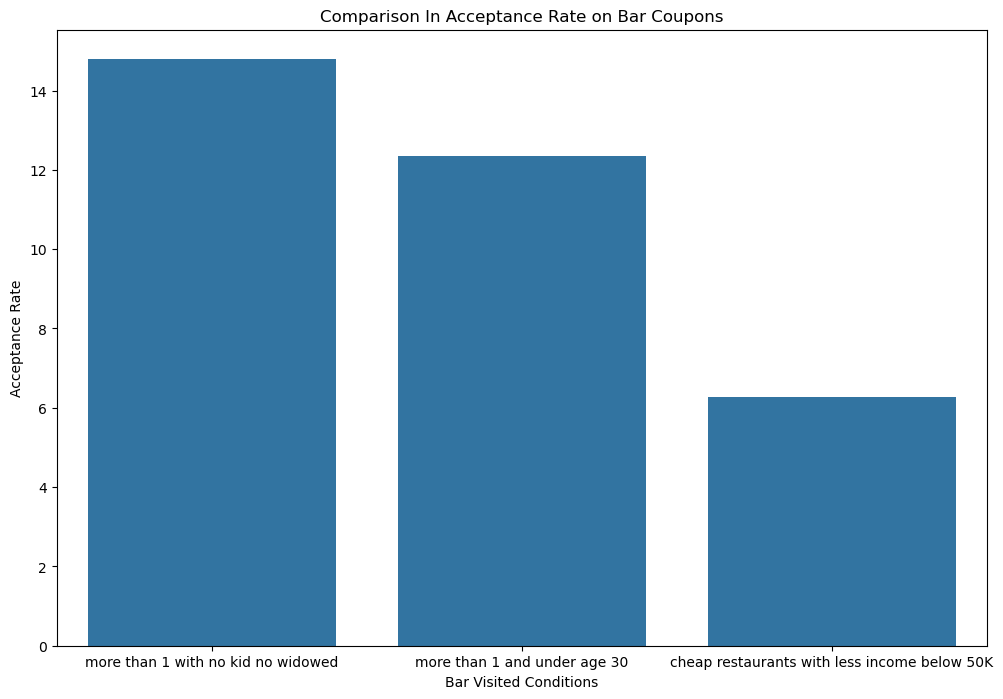

In [40]:
#Filtered the data on dataframe with Bar coupon when driver visited more than once a month, with passengers that were no a kid, and were not windowed
accepted_bar_coupons_more_than_1_no_kid_not_windwed = bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(['1~3','4~8','gt8'])) & (bar_coupons_df['has_children'] == 0) & (bar_coupons_df['maritalStatus'] != 'Widowed') & (bar_coupons_df['Y'] == 1)]
count_accepted_bar_coupons_more_than_1_no_kid_not_windwed = len(accepted_bar_coupons_more_than_1_no_kid_not_windwed)

#Calculate acceptance_rate for drivers with bar coupon go to bars more than once a month with passengers that were no a kid, and were not windowed on total bar coupon
acceptance_rate_bar_coupons_more_than_1_no_kid_not_windwed = (count_accepted_bar_coupons_more_than_1_no_kid_not_windwed/count_total_bar_coupon) * 100

#Filtered the data on dataframe with Bar coupon when driver visited more than once a month, with passengers that are under the age of 30
accepted_bar_coupons_more_than_1_under_age_30 = bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(['1~3','4~8','gt8'])) & (bar_coupons_df['age'].isin(['21','26','below21'])) & (bar_coupons_df['Y'] == 1)]
count_accepted_bar_coupons_more_than_1_under_age_30 = len(accepted_bar_coupons_more_than_1_under_age_30)

#Calculate acceptance_rate for drivers with bar coupon go to bars more than once a month under the age of 30 on total bar coupon
acceptance_rate_bar_coupons_more_than_1_under_age_30 = (count_accepted_bar_coupons_more_than_1_under_age_30/count_total_bar_coupon) * 100

#Filtered the data on dataframe with Bar coupon when driver visited cheap restaurants more than 4 times a month and income is less than 50K
accepted_bar_coupons_with_cheap_restaurants_less_income = bar_coupons_df.loc[(bar_coupons_df['RestaurantLessThan20'].isin(['4~8','gt8'])) & (bar_coupons_df['income'].isin(['$37500 - $49999','$25000 - $37499','$12500 - $24999'])) & (bar_coupons_df['Y'] == 1)]
count_accepted_bar_coupons_with_cheap_restaurants_less_income = len(accepted_bar_coupons_with_cheap_restaurants_less_income)

#Calculate acceptance_rate for drivers with bar coupon when driver visited cheap restaurants more than 4 times a month and income is less than 50K on total bar coupon
acceptance_rate_count_accepted_bar_coupons_with_cheap_restaurants_less_income = (count_accepted_bar_coupons_with_cheap_restaurants_less_income/count_total_bar_coupon) * 100

#Dataset is created to represent the comparison between different accepted rates calculated for multiple conditions
accepted_rate_on_bar_coupons_data_multiple_conditions = {'Bar Visited Conditions': ['more than 1 with no kid no widowed', 'more than 1 and under age 30', 'cheap restaurants with less income below 50K']}
accepted_rate_on_bar_coupons_data_multiple_conditions['Bar Accpeted Total Count'] = [count_bar_coupons_df_accepted, count_bar_coupons_df_accepted, count_bar_coupons_df_accepted]
accepted_rate_on_bar_coupons_data_multiple_conditions['Acceptance Rate'] = [acceptance_rate_bar_coupons_more_than_1_no_kid_not_windwed, acceptance_rate_bar_coupons_more_than_1_under_age_30, acceptance_rate_count_accepted_bar_coupons_with_cheap_restaurants_less_income]

#Dataframe is generated using the dataset prepared for different conditions.
accepted_rate_on_bar_coupons_data_multiple_conditions_df = pd.DataFrame(accepted_rate_on_bar_coupons_data_multiple_conditions)

#Used Seaborn to plot the comparison between acceptance rate for bar coupon for driver who can accept the coupon for driver who visited more than 1 once with passenger without kid and that were not widowed to drivers go to bars more than once a month and are under the age of 30 and to drivers go to cheap restaurants more than 4 times a month and income is less than 50K.

# Create the figure and axes
figure, axes = plt.subplots(figsize=(12, 8))

# Create the barplot to display the Bar coupon on different status
sns.barplot(data=accepted_rate_on_bar_coupons_data_multiple_conditions_df, x='Bar Visited Conditions', y='Acceptance Rate', ax=axes)

# Set the title
plt.title("Comparison In Acceptance Rate on Bar Coupons")

# Show the plot
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

7.631991636173549


Text(0.5, 1.0, 'Coupon Accepted/Rejected Status on Bar Coupon')

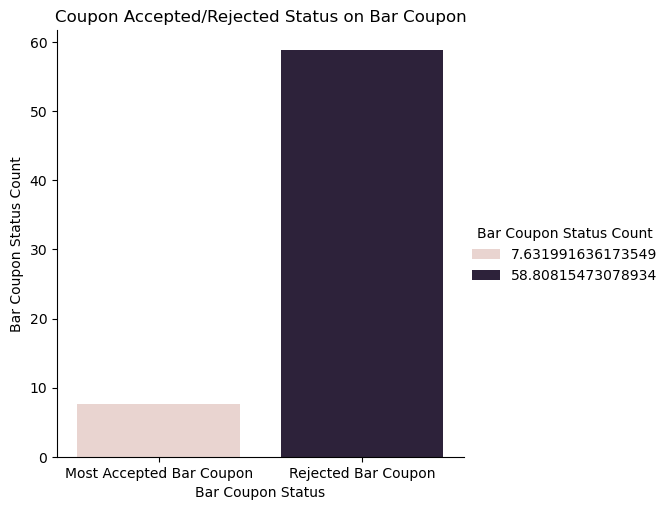

In [63]:
#Based on above observation the hypothesis about drivers who always accepted the bar coupons are one who visited bar more than 1 times, have occupation other than farming, fishing and forestry, With no kid as passenger and with age above 25.
#Filtered the bar coupon on drivers who visited bar more than once, with no kid as passenger, above age 25 and have occupation other than fishing, farming and frosetry.
filtered_accepted_bar_coupon_df = bar_coupons_df.loc[(bar_coupons_df['Bar'].isin(['1~3','4~8','gt8'])) & (bar_coupons_df['has_children'] == 0) & (bar_coupons_df['occupation'] != 'Unemployed') & (bar_coupons_df['age'].isin(['26','31','36','41','46','50plus'])) & (bar_coupons_df['Y'] == 1)]
count_filtered_accepted_bar_coupon = len(filtered_accepted_bar_coupon_df)

#calculate acceptance rate for drivers with above condition based on total bar coupon.
accpetance_rate_on_all_favorable_condition = (count_filtered_accepted_bar_coupon/count_total_bar_coupon) * 100
print(accpetance_rate_on_all_favorable_condition )

#Calaculate rejected bar coupon and calculate the rejected rate 
count_rejected_bar_coupon = len(bar_coupons_df.query('Y == 0'))
rejected_rate_for_bar_coupon = (count_rejected_bar_coupon/count_total_bar_coupon) * 100


#Prepare the dataset to store the accepted rate for specific characteristics of drivers with Bar Coupon and rejected rate.
most_accepted_bar_coupons_data = {'Bar Coupon Status': ['Most Accepted Bar Coupon', 'Rejected Bar Coupon'],
                               'Bar Coupon Status Count' : [accpetance_rate_on_all_favorable_condition, rejected_rate_for_bar_coupon]}
most_accepted_bar_coupon_df = pd.DataFrame(most_accepted_bar_coupons_data) 

# Create the barplot to display the Bar coupon status to display the comparison between accepted and rejected rate 
sns.catplot(x='Bar Coupon Status', y='Bar Coupon Status Count', kind='bar', data=most_accepted_bar_coupon_df, hue='Bar Coupon Status Count')

# Set the title
plt.title("Coupon Accepted/Rejected Status on Bar Coupon")

#From the plot it clearly states that the for bar coupon the most favorable condition when drivers accepted the Bar coupon has 7.6 acceptance rate on overall bar coupon and 58.8 rejection rate. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

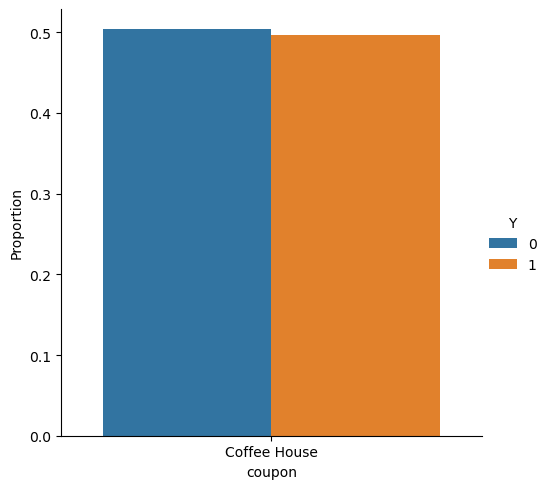

In [44]:
#create a dataframe for a Coffee House coupons and get the count of dataframe.
coffee_house_coupons_df = data.loc[(data['coupon'] == 'Coffee House')]
count_total_coffee_house_coupon = len(coffee_house_coupons_df)

#Calculate the proportion of Coffee House Coupon were accepted.
coffee_house_coupon_proportion_df = coffee_house_coupons_df.groupby('coupon')['Y'].value_counts(normalize=True).reset_index(name='Proportion')

# Using Seaborn to plot Categorical estimation plot to represent propoartion of Coffee House coupon. 
sns.catplot(x='coupon', y='Proportion', hue='Y', kind='bar', data=coffee_house_coupon_proportion_df)
                   

34.66981132075472
14.963312368972748
  Coffee House Visited Condition  Coffee House Total Count  Acceptance Rate
0               3 or fewer times                      3816        34.669811
1              more than 3 times                      3816        14.963312


Text(0.5, 1.0, 'Comparison In Acceptance Rates for Coffee House Coupon')

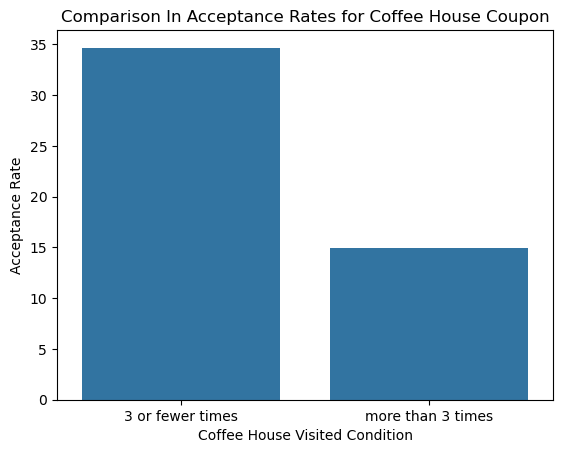

In [46]:
#Compare the acceptance rate between those who went to a Coffee House 3 or fewer times a month to those who went more.

#Filtered the coffee house coupon data who went to Coffee House 3 or fewer time and accepted the coupon
coffee_house_3_or_less_accepted_result = coffee_house_coupons_df.loc[(coffee_house_coupons_df['CoffeeHouse'].isin(['never','less1','1~3'])) & (coffee_house_coupons_df['Y'] == 1)]
count_coffee_house_3_or_less_accepted_result = len(coffee_house_3_or_less_accepted_result)

#calculate the acceptance rate of drivers who went to a Coffee House 3 or fewer time over total Coffee House coupon.
accepted_rate_for_3_or_less_coffee_house_coupon = (count_coffee_house_3_or_less_accepted_result / count_total_coffee_house_coupon) * 100
print(accepted_rate_for_3_or_less_coffee_house_coupon)

#Filtered the Coffee House coupon drivers who went to a Coffee House more than 3 times over total Coffee House coupons accepted.
coffee_house_more_than_3_result = coffee_house_coupons_df.loc[(coffee_house_coupons_df['CoffeeHouse'].isin(['4~8','gt8'])) & (coffee_house_coupons_df['Y'] == 1)]
count_coffee_house_more_than_3_result = len(coffee_house_more_than_3_result)

#calculate the acceptance rate of drivers who went to a Coffee House  more than 3 times over total Coffee House coupons.
accepted_rate_for_more_than_3_coffee_house_coupon = (count_coffee_house_more_than_3_result / count_total_coffee_house_coupon) * 100
print(accepted_rate_for_more_than_3_coffee_house_coupon)

#Dataset to represent the bar acceptance rate for different visited conditions. The dataset contains coffee house conditions, Coffee House Total Count and Coffee House Acceptance rate 
accepted_rate_on_coffee_house_coupons_data = { 'Coffee House Visited Condition': ['3 or fewer times', 'more than 3 times']}
accepted_rate_on_coffee_house_coupons_data['Coffee House Total Count'] = [count_total_coffee_house_coupon, count_total_coffee_house_coupon]
accepted_rate_on_coffee_house_coupons_data['Acceptance Rate'] = [accepted_rate_for_3_or_less_coffee_house_coupon, accepted_rate_for_more_than_3_coffee_house_coupon]

#Create the data frame
accepted_rate_on_coffee_house_coupons_df = pd.DataFrame(accepted_rate_on_coffee_house_coupons_data)
print(accepted_rate_on_coffee_house_coupons_df)

#SeaBorn graph to highlight the acceptance rate for condition. This is noticed that driver who visited bar more than 3 times has more acceptance rate for the bar coupon.
sns.barplot(data=accepted_rate_on_coffee_house_coupons_df, x='Coffee House Visited Condition', y='Acceptance Rate')

# Set the title
plt.title("Comparison In Acceptance Rates for Coffee House Coupon")


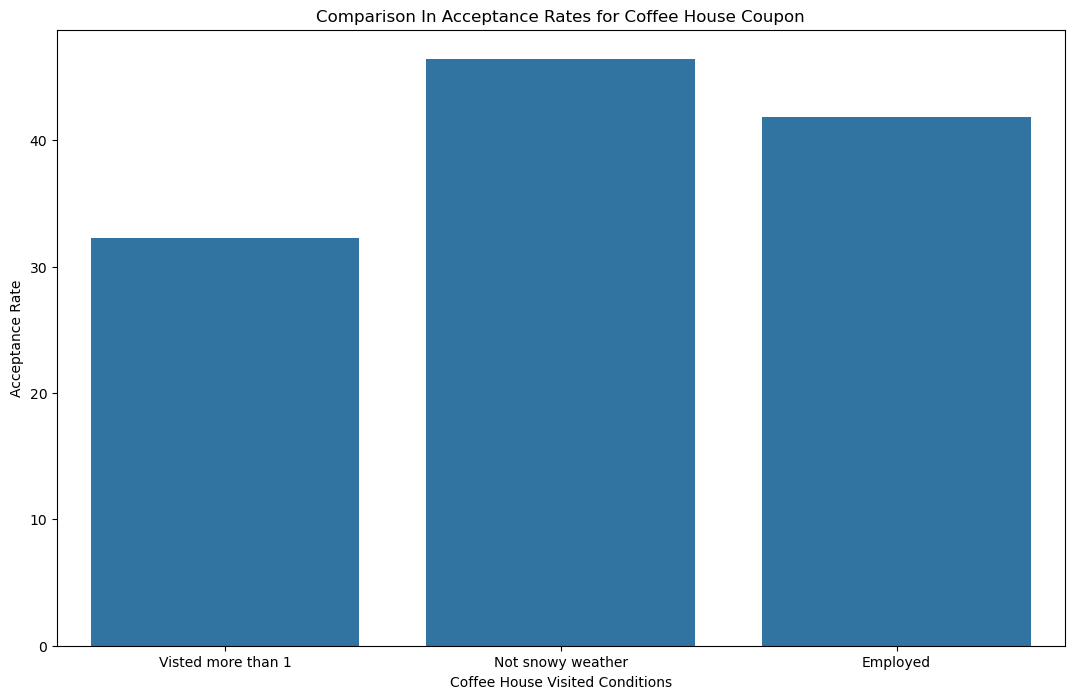

In [729]:
#compare the acceptance rate between drivers who go to Coffee House more than once a month, not in Snowy weather and was not unemployed.

#Filtered the data on dataframe with Coffee House coupon when driver visited more than once a month.
accepted_coffee_house_coupons_more_than_1 = coffee_house_coupons_df.loc[(coffee_house_coupons_df['CoffeeHouse'].isin(['1~3','4~8','gt8'])) & (coffee_house_coupons_df['Y'] == 1)]
count_accepted_coffee_house_coupons_more_than_1 = len(accepted_coffee_house_coupons_more_than_1)

#Calculated accepted rate for cofee house coupon with more than one visit on total Coffee House coupon.
acceptance_rate_coffee_house_coupons_more_than_1 = (count_accepted_coffee_house_coupons_more_than_1/count_total_coffee_house_coupon) * 100

#Filtered the data on dataframe with Coffee House coupon when there is no snowy.
accepted_coffee_house_coupons_with_no_snowy = coffee_house_coupons_df.loc[(coffee_house_coupons_df['weather'] != 'Snowy') & (coffee_house_coupons_df['Y'] == 1)]
count_accepted_coffee_house_coupons_with_no_snowy = len(accepted_coffee_house_coupons_with_no_snowy)

#Calculated accepted rate for Coffee House coupon when there is no snowy.
acceptance_rate_coffee_house_coupons_with_no_snowy = (count_accepted_coffee_house_coupons_with_no_snowy/count_total_coffee_house_coupon) * 100

#Filtered the data dataframe with Coffee House coupon when driver is not unemployed. 
accepted_coffee_house_coupons_with_occupation = coffee_house_coupons_df.loc[(coffee_house_coupons_df['occupation'] != 'Unemployed') & (coffee_house_coupons_df['Y'] == 1)]
count_accepted_coffee_house_coupons_with_occupation = len(accepted_bar_coupons_with_occupation)

#Calculated accepted rate for Coffee House coupon when driver is not unemployed on total coffee house coupon 
acceptance_rate_count_accepted_coffee_house_coupons_with_occupation = (count_accepted_coffee_house_coupons_with_occupation/count_total_coffee_house_coupon) * 100

#Dataset is created to represent the comparison between different accepted rates calculated for different conditions.
accepted_rate_on_coffee_house_coupons_data_additional_condition = { 'Coffee House Visited Conditions': ['Visted more than 1', 'Not snowy weather', 'Employed']}
accepted_rate_on_coffee_house_coupons_data_additional_condition['Coffee House Accpeted Total Count'] = [count_total_coffee_house_coupon, count_total_coffee_house_coupon, count_total_coffee_house_coupon]
accepted_rate_on_coffee_house_coupons_data_additional_condition['Acceptance Rate'] = [acceptance_rate_coffee_house_coupons_more_than_1, acceptance_rate_coffee_house_coupons_with_no_snowy, acceptance_rate_count_accepted_coffee_house_coupons_with_occupation]

#Dataframe is generated using the dataset prepared for different conditions.
accepted_rate_on_coffee_house_coupons_additional_condition_df = pd.DataFrame(accepted_rate_on_coffee_house_coupons_data_additional_condition)

#Used Seaborn to plot the comparison between acceptance rate for coffee house coupon for driver who can accept the coupon for driver who visited more than 1 once, with no snowy weather and when driver is not unemployed on total coffee house coupon.
# Create the figure and axes
fig1, ax1 = plt.subplots(figsize=(13, 8))

# Create the barplot to display the accpetance on different condition
sns.barplot(data=accepted_rate_on_coffee_house_coupons_additional_condition_df, x='Coffee House Visited Conditions', y='Acceptance Rate', ax=ax1 )

# Set the title
plt.title("Comparison In Acceptance Rates for Coffee House Coupon")

# Show the plot
plt.show()

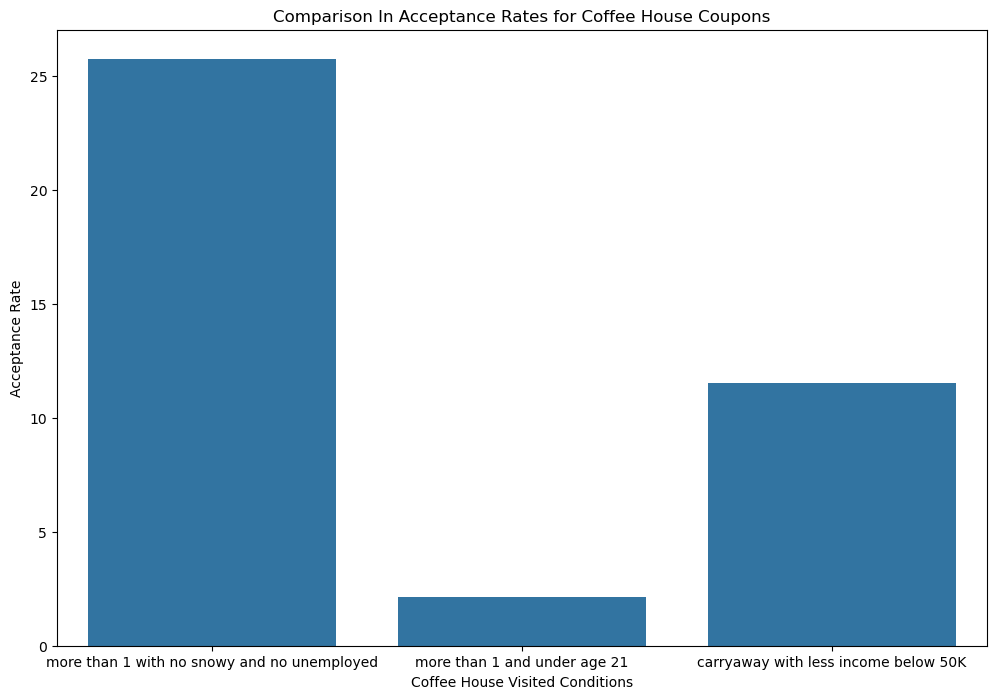

In [50]:
#Compare the acceptance rates between those drivers who:

#- go to Coffee House more than once a month, not in Snowy weather, and were not unemployed *OR*
# - go to Coffee House more than once a month and are under the age of 21 *OR*
#- go for carryaway more than 4 times a month and income is less than 50K.

#Filtered the data on dataframe with  coupon when driver visited more than once a month, with no Snowy weather, and were not unemployed
accepted_coffee_house_coupons_more_than_1_no_snowy_not_unemployed = coffee_house_coupons_df.loc[(coffee_house_coupons_df['CoffeeHouse'].isin(['1~3','4~8','gt8'])) & (coffee_house_coupons_df['weather'] != 'Snowy') & (coffee_house_coupons_df['occupation'] != 'Unemployed') & (coffee_house_coupons_df['Y'] == 1)]
count_accepted_coffee_house_coupons_more_than_1_no_snowy_not_unemployed = len(accepted_coffee_house_coupons_more_than_1_no_snowy_not_unemployed)

#Calculate acceptance_rate for drivers with coffee house coupon go to coffee house more than once a month with no Snowy weather, and were not unemployed on total coffee house coupon
acceptance_rate_coffee_house_coupons_more_than_1_no_snowy_not_unemployed = (count_accepted_coffee_house_coupons_more_than_1_no_snowy_not_unemployed/count_total_coffee_house_coupon) * 100

#Filtered the data on dataframe with coffee house coupon when driver visited more than once a month, with passengers that are under the age of 21
accepted_coffee_house_coupon_more_than_1_under_age_21 = coffee_house_coupons_df.loc[(coffee_house_coupons_df['CoffeeHouse'].isin(['1~3','4~8','gt8'])) & (coffee_house_coupons_df['age'].isin(['below21'])) & (coffee_house_coupons_df['Y'] == 1)]
count_accepted_coffee_house_coupon_more_than_1_under_age_21 = len(accepted_coffee_house_coupon_more_than_1_under_age_21)

#Calculate acceptance_rate for drivers with coffee house coupon go to coffee more than once with passengers that are under the age of 21 on total coffee house coupon
acceptance_rate_coffee_house_coupons_more_than_1_under_age_21 = (count_accepted_coffee_house_coupon_more_than_1_under_age_21/count_total_coffee_house_coupon) * 100

#Filtered the data on dataframe with Coffee House coupon when driver went for carryaway more than 4 times a month and income is less than 50K
accepted_coffee_house_coupons_with_carryaway_less_income = coffee_house_coupons_df.loc[(coffee_house_coupons_df['CarryAway'].isin(['4~8','gt8'])) & (coffee_house_coupons_df['income'].isin(['$37500 - $49999','$25000 - $37499','$12500 - $24999'])) & (coffee_house_coupons_df['Y'] == 1)]
count_accepted_coffee_house_coupons_with_carryaway_less_income = len(accepted_coffee_house_coupons_with_carryaway_less_income)

#Calculate acceptance_rate for drivers with bar coupon when driver went for carryaway more than 4 times a month and income is less than 50K on total coffee house coupon
acceptance_rate_count_accepted_coffee_house_coupons_with_carryaway_less_income = (count_accepted_coffee_house_coupons_with_carryaway_less_income/count_total_coffee_house_coupon) * 100

#Dataset is created to represent the comparison between different accepted rates calculated for multiple conditions
accepted_rate_on_coffee_house_coupons_data_multiple_conditions = {'Coffee House Visited Conditions': ['more than 1 with no snowy and no unemployed', 'more than 1 and under age 21', 'carryaway with less income below 50K']}
accepted_rate_on_coffee_house_coupons_data_multiple_conditions['Coffee House Accpeted Total Count'] = [count_total_coffee_house_coupon, count_total_coffee_house_coupon, count_total_coffee_house_coupon]
accepted_rate_on_coffee_house_coupons_data_multiple_conditions['Acceptance Rate'] = [acceptance_rate_coffee_house_coupons_more_than_1_no_snowy_not_unemployed, acceptance_rate_coffee_house_coupons_more_than_1_under_age_21, acceptance_rate_count_accepted_coffee_house_coupons_with_carryaway_less_income]

#Dataframe is generated using the dataset prepared for different conditions.
accepted_rate_on_coffee_house_coupons_data_multiple_conditions_df = pd.DataFrame(accepted_rate_on_coffee_house_coupons_data_multiple_conditions)

#Used Seaborn to plot the comparison between acceptance rate for bar coupon for driver who can accept the coupon for driver who visited more than 1 once with no snowy weather and that were not unemployed to drivers who go to Coffee House more than once a month and are under the age of 21 and to drivers who go to carryaway more than 4 times a month and income is less than 50K.

# Create the figure and axes
figure1, axes1 = plt.subplots(figsize=(12, 8))

# Create the barplot to display the coffee House coupon on different status
sns.barplot(data=accepted_rate_on_coffee_house_coupons_data_multiple_conditions_df, x='Coffee House Visited Conditions', y='Acceptance Rate', ax=axes1)

# Set the title
plt.title("Comparison In Acceptance Rates for Coffee House Coupons")

# Show the plot
plt.show()


23.768343815513624


Text(0.5, 1.0, 'Coffee House Coupon Accepted/Rejected Status')

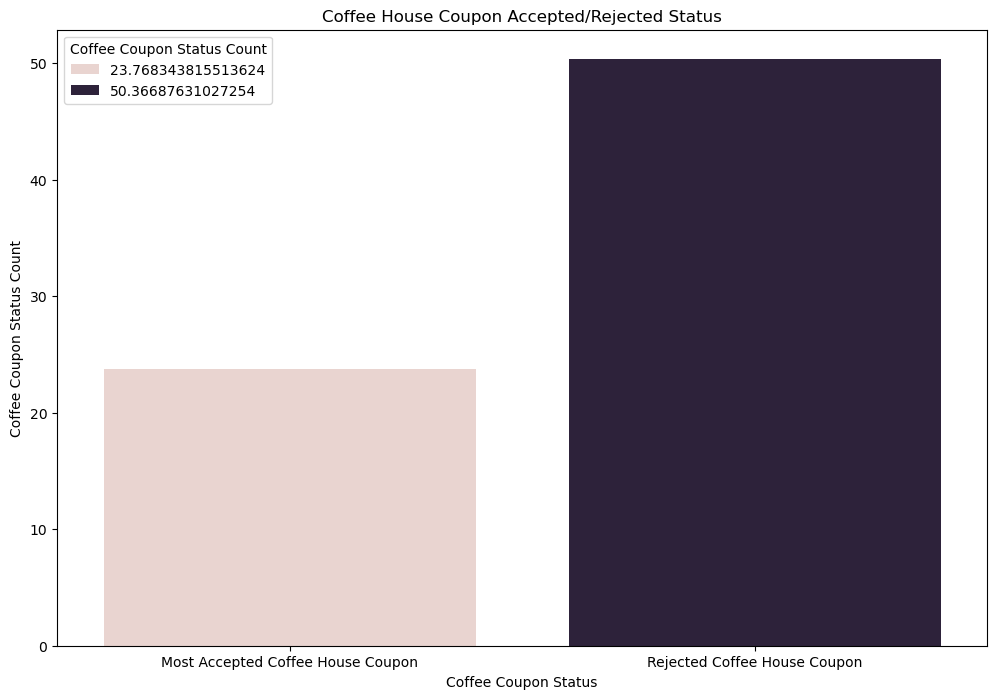

In [52]:
#Share Hypothesis based on above observation
#Based on above observation the hypothesis about drivers who always accepted the Coffee House coupons are one who visited coffee house more than 1 times, were not unemployed, With no snowy weather and with age above 21.
#Filtered the bar coupon on drivers who visited coffee house more than 1 times, were not unemployed, With no snowy weather and with age above 21.
filtered_accepted_coffee_house_coupon_df = coffee_house_coupons_df.loc[(coffee_house_coupons_df['CoffeeHouse'].isin(['1~3','4~8','gt8'])) & (coffee_house_coupons_df['weather'] != 'Snowy') & (coffee_house_coupons_df['occupation'] != 'Unemployed') & (coffee_house_coupons_df['age'].isin(['21','26','31','36','41','46','50plus'])) & (coffee_house_coupons_df['Y'] == 1)]
count_filtered_accepted_coffee_house_coupon = len(filtered_accepted_coffee_house_coupon_df)

#calculate acceptance rate for drivers with above condition based on total Coffee House coupon.
accpetance_rate_on_all_favorable_condition_coffee_coupon = (count_filtered_accepted_coffee_house_coupon/count_total_coffee_house_coupon) * 100
print(accpetance_rate_on_all_favorable_condition_coffee_coupon )

#Calaculate rejected coffee house coupon and calculate the rejected rate 
count_rejected_coffee_house_coupon = len(coffee_house_coupons_df.query('Y == 0'))
rejected_rate_for_coffee_house_coupon = (count_rejected_coffee_house_coupon/count_total_coffee_house_coupon) * 100


#Prepare the dataset to store the accepted rate for specific characteristics of drivers with Coffee House Coupon and rejected rate for Coffee House.
most_accepted_coffee_house_coupons_data = {'Coffee Coupon Status': ['Most Accepted Coffee House Coupon', 'Rejected Coffee House Coupon'],
                               'Coffee Coupon Status Count' : [accpetance_rate_on_all_favorable_condition_coffee_coupon, rejected_rate_for_coffee_house_coupon]}
most_accepted_coffee_house_coupon_df = pd.DataFrame(most_accepted_coffee_house_coupons_data) 

# Create the figure and axes
figure2, axes2 = plt.subplots(figsize=(12, 8))

# Create the barplot to display the Bar coupon status to display the comparison between accepted and rejected rate 
sns.barplot(x='Coffee Coupon Status', y='Coffee Coupon Status Count', data=most_accepted_coffee_house_coupon_df, hue='Coffee Coupon Status Count',  ax=axes2 )

# Set the title
plt.title("Coffee House Coupon Accepted/Rejected Status")

#From the plot it clearly states that the for bar coupon the most favorab

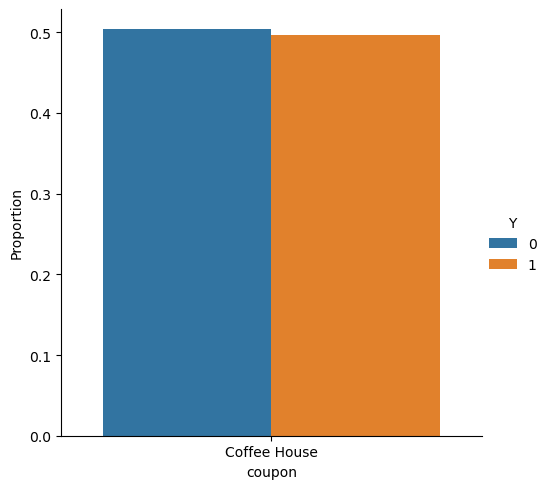

In [54]:
coffee_house_coupon_proportion_df = coffee_house_coupons_df.groupby('coupon')['Y'].value_counts(normalize=True).reset_index(name='Proportion')

# Using Seaborn to plot Categorical estimation plot to represent propoartion of bar coupon. 
sns.catplot(x='coupon', y='Proportion', hue='Y', kind='bar', data=coffee_house_coupon_proportion_df)